In [1]:
# READ DATA
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt  

data_train= pd.read_csv("C:/COURSE_PYTHON_PANDAS_HOMEWORK/Titanic/train.csv")  #891rows
gender= pd.read_csv("C:/COURSE_PYTHON_PANDAS_HOMEWORK/Titanic/gender_submission.csv") #418rows
data_test= pd.read_csv("C:/COURSE_PYTHON_PANDAS_HOMEWORK/Titanic/test.csv")  #418rows
#waht is train data?

# #PassengerId：只是个乘客序号；
# Survived：最终是否存活；
# Pclass：舱位，1是头等舱，3是最低等，从电影里看，这个影响还是挺大的；
# Name：乘客姓名，除非是要算命，不然应该没啥影响；
# Sex：性别，应该影响很大；
# Age：年龄，有一部分数据缺失；
# SibSp：一同上船的兄弟姐妹或配偶；
# Parch：一同上船的父母或子女，目测这两项应该没啥影响吧，除非是要是一起死的那种；
# Ticket：船票信息，比较乱，完全看不出有任何用处；
# Fare：乘客票价，这个数据应该和Pclass有一定对应关系；
# Cabin：客舱编号
# Embarked：上船地点，主要是S（南安普顿）、C（瑟堡）、Q（皇后镇）


In [1]:
pwd

'C:\\Users\\Elisa\\Documents'

In [2]:
data_train[:1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [3]:
gender[:2]

,PassengerId,Survived
0,892,0
1,893,1


In [4]:
dt_train_p=data_train.drop(['Name','Ticket','Cabin'],axis=1)    #axis=1是x軸
dt_train_p[:3]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S


In [5]:
from pandas import Series,DataFrame

In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


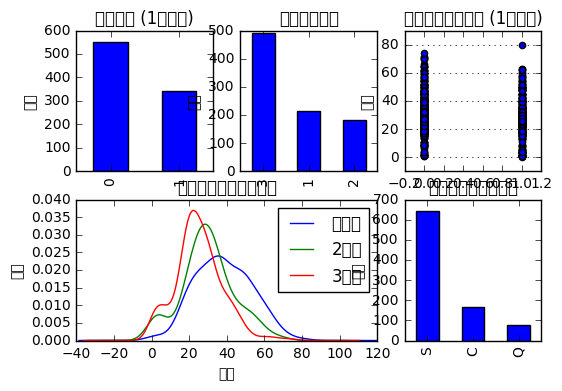

In [7]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

plt.subplot2grid((2,3),(0,0))             # 在一张大图里分列几个小图
data_train.Survived.value_counts().plot(kind='bar')# 柱状图 
plt.title(u"获救情况 (1为获救)") # 标题
plt.ylabel(u"人数")  

plt.subplot2grid((2,3),(0,1))
data_train.Pclass.value_counts().plot(kind="bar")
plt.ylabel(u"人数")
plt.title(u"乘客等级分布")

plt.subplot2grid((2,3),(0,2))
plt.scatter(data_train.Survived, data_train.Age)
plt.ylabel(u"年龄")                         # 设定纵坐标名称
plt.grid(b=True, which='major', axis='y') 
plt.title(u"按年龄看获救分布 (1为获救)")


plt.subplot2grid((2,3),(1,0), colspan=2)
data_train.Age[data_train.Pclass == 1].plot(kind='kde')   
data_train.Age[data_train.Pclass == 2].plot(kind='kde')
data_train.Age[data_train.Pclass == 3].plot(kind='kde')
plt.xlabel(u"年龄")# plots an axis lable
plt.ylabel(u"密度") 
plt.title(u"各等级的乘客年龄分布")
plt.legend((u'头等舱', u'2等舱',u'3等舱'),loc='best') # sets our legend for our graph.


plt.subplot2grid((2,3),(1,2))
data_train.Embarked.value_counts().plot(kind='bar')
plt.title(u"各登船口岸上船人数")
plt.ylabel(u"人数")  
plt.show()

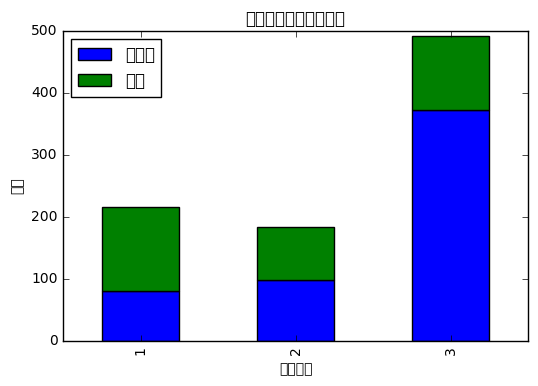

In [8]:
#看看各乘客等级的获救情况
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_0 = data_train.Pclass[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Pclass[data_train.Survived == 1].value_counts()
df=pd.DataFrame({u'获救':Survived_1, u'未获救':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u"各乘客等级的获救情况")
plt.xlabel(u"乘客等级") 
plt.ylabel(u"人数") 
plt.show()

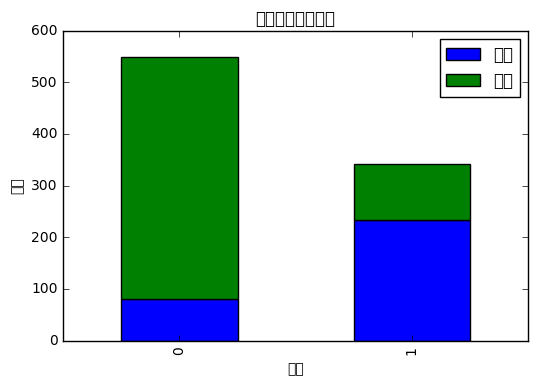

In [9]:
#看看各性别的获救情况
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_m = data_train.Survived[data_train.Sex == 'male'].value_counts()
Survived_f = data_train.Survived[data_train.Sex == 'female'].value_counts()
df=pd.DataFrame({u'男性':Survived_m, u'女性':Survived_f})
df.plot(kind='bar', stacked=True)
plt.title(u"按性别看获救情况")
plt.xlabel(u"性别") 
plt.ylabel(u"人数")
plt.show()

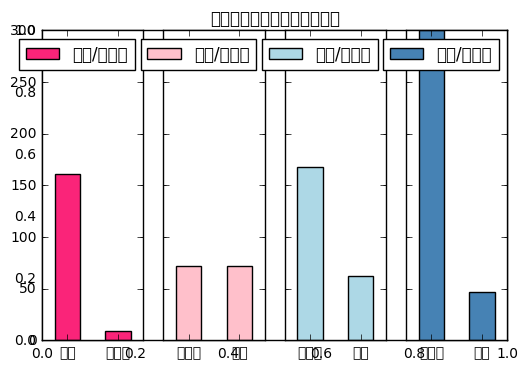

In [10]:
#然后我们再来看看各种舱级别情况下各性别的获救情况
fig=plt.figure()
fig.set(alpha=0.65) # 设置图像透明度，无所谓
plt.title(u"根据舱等级和性别的获救情况")

ax1=fig.add_subplot(141)
data_train.Survived[data_train.Sex == 'female'][data_train.Pclass != 3].value_counts().plot(kind='bar', label="female highclass", color='#FA2479')
ax1.set_xticklabels([u"获救", u"未获救"], rotation=0)
ax1.legend([u"女性/高级舱"], loc='best')

ax2=fig.add_subplot(142, sharey=ax1)
data_train.Survived[data_train.Sex == 'female'][data_train.Pclass == 3].value_counts().plot(kind='bar', label='female, low class', color='pink')
ax2.set_xticklabels([u"未获救", u"获救"], rotation=0)
plt.legend([u"女性/低级舱"], loc='best')

ax3=fig.add_subplot(143, sharey=ax1)
data_train.Survived[data_train.Sex == 'male'][data_train.Pclass != 3].value_counts().plot(kind='bar', label='male, high class',color='lightblue')
ax3.set_xticklabels([u"未获救", u"获救"], rotation=0)
plt.legend([u"男性/高级舱"], loc='best')

ax4=fig.add_subplot(144, sharey=ax1)
data_train.Survived[data_train.Sex == 'male'][data_train.Pclass == 3].value_counts().plot(kind='bar', label='male low class', color='steelblue')
ax4.set_xticklabels([u"未获救", u"获救"], rotation=0)
plt.legend([u"男性/低级舱"], loc='best')

plt.show()

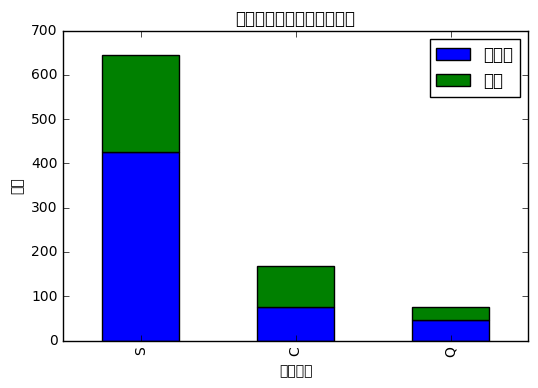

In [11]:
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_0 = data_train.Embarked[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Embarked[data_train.Survived == 1].value_counts()
df=pd.DataFrame({u'获救':Survived_1, u'未获救':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u"各登录港口乘客的获救情况")
plt.xlabel(u"登录港口") 
plt.ylabel(u"人数") 

plt.show()

In [12]:
g = data_train.groupby(['SibSp','Survived'])
df = pd.DataFrame(g.count()['PassengerId'])
df

g = data_train.groupby(['SibSp','Survived'])
df = pd.DataFrame(g.count()['PassengerId'])
df

PassengerId
SibSp Survived             
0     0                 398
      1                 210
1     0                  97
      1                 112
2     0                  15
      1                  13
3     0                  12
      1                   4
4     0                  15
      1                   3
5     0                   5
8     0                   7

In [13]:
data_train.Cabin.value_counts()

B96 B98            4
G6                 4
C23 C25 C27        4
D                  3
C22 C26            3
E101               3
F2                 3
F33                3
C2                 2
B51 B53 B55        2
E33                2
B49                2
E25                2
B77                2
B35                2
E121               2
C124               2
D20                2
E44                2
F4                 2
B5                 2
C126               2
C123               2
B22                2
C125               2
E24                2
C93                2
C65                2
B20                2
B57 B59 B63 B66    2
                  ..
C7                 1
B94                1
B78                1
D15                1
A6                 1
D49                1
B42                1
C99                1
C32                1
F G63              1
E34                1
D45                1
C103               1
B86                1
D46                1
C47                1
C106         

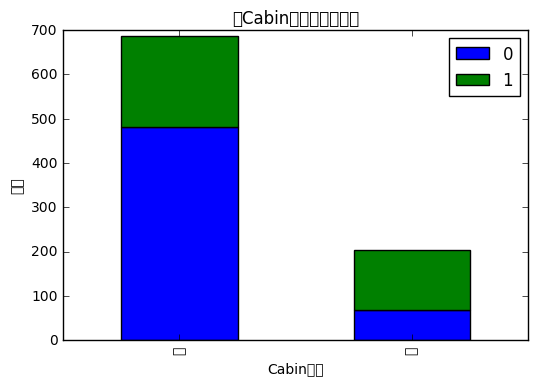

In [14]:
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_cabin = data_train.Survived[pd.notnull(data_train.Cabin)].value_counts()
Survived_nocabin = data_train.Survived[pd.isnull(data_train.Cabin)].value_counts()
df=pd.DataFrame({u'有':Survived_cabin, u'无':Survived_nocabin}).transpose()
df.plot(kind='bar', stacked=True)
plt.title(u"按Cabin有无看获救情况")
plt.xlabel(u"Cabin有无") 
plt.ylabel(u"人数")
plt.show()

In [16]:
import pandas as pd  

data=pd.read_csv('C:/COURSE_PYTHON_PANDAS_HOMEWORK/Titanic/train.csv')  

#剔除變量  

data.drop(['PassengerId','Ticket'],axis=1,inplace=True)  

#補全Embarked變量  

data.loc[data.Embarked.isnull(),'Embarked']='S'  

#one-hot編碼  

from sklearn.preprocessing import OneHotEncoder  

from sklearn.preprocessing import LabelEncoder  
from sklearn.preprocessing import OneHotEncoder

#ohe_pclass=OneHotEncoder(sparse=False).fit(data[['Pclass']])  

#Pclass_ohe=ohe_pclass.transform(data[['Pclass']])  

le_sex=LabelEncoder().fit(data['Sex'])  

Sex_label=le_sex.transform(data['Sex'])  

ohe_sex=OneHotEncoder(sparse=False).fit(Sex_label.reshape(-1,1))  

Sex_ohe=ohe_sex.transform(Sex_label.reshape(-1,1))  

le_embarked=LabelEncoder().fit(data['Embarked'])  

Embarked_label=le_embarked.transform(data['Embarked'])  

ohe_embarked=OneHotEncoder(sparse=False).fit(Embarked_label.reshape(-1,1))  

Embarked_ohe=ohe_embarked.transform(Embarked_label.reshape(-1,1))  

def replace_name(x):  

    if 'Mrs' in x:  
        return 'Mrs'  

    elif 'Mr' in x:  

        return 'Mr'  

    else:  

        return 'Miss'  

data['Name']=data['Name'].map(lambda x:replace_name(x))  

le_name=LabelEncoder().fit(data['Name'])  

Name_label=le_name.transform(data['Name'])  

ohe_name=OneHotEncoder(sparse=False).fit(Name_label.reshape(-1,1))  

Name_ohe=ohe_name.transform(Name_label.reshape(-1,1))  

data['Sex_0']=Sex_ohe[:,0]  

data['Sex_1']=Sex_ohe[:,1]  

data['Embarked_0']=Embarked_ohe[:,0]  

data['Embarked_1']=Embarked_ohe[:,1]  

data['Embarked_2']=Embarked_ohe[:,2]  

data['Name_0']=Name_ohe[:,0]  

data['Name_1']=Name_ohe[:,1]  

data['Name_2']=Name_ohe[:,2]  

#歸一化處理  

from sklearn.preprocessing import StandardScaler  

Pclass_scale=StandardScaler().fit(data['Pclass'])  

data['Pclass_scaled']=StandardScaler().fit_transform(data['Pclass'].reshape(-1,1),Pclass_scale)  

Fare_scale=StandardScaler().fit(data['Fare'])  

data['Fare_scaled']=StandardScaler().fit_transform(data['Fare'].reshape(-1,1),Fare_scale)  

SibSp_scale=StandardScaler().fit(data['SibSp'])  

data['SibSp_scaled']=StandardScaler().fit_transform(data['SibSp'].reshape(-1,1),SibSp_scale)  

Parch_scale=StandardScaler().fit(data['Parch'])  

data['Parch_scaled']=StandardScaler().fit_transform(data['Parch'].reshape(-1,1),Parch_scale)  

#預測年紀並補全  

from sklearn.ensemble import RandomForestRegressor  

def set_missing_age(data):  

    train=data[['Age','SibSp_scaled','Parch_scaled','Name_0','Name_1','Name_2','Sex_0','Sex_1']]  

    known_age=train[train.Age.notnull()].as_matrix()  

    unknown_age=train[train.Age.isnull()].as_matrix()  

    y=known_age[:,0]  

    x=known_age[:,1:]  

    rf=RandomForestRegressor(random_state=0,n_estimators=200,n_jobs=-1)  

    rf.fit(x,y)  

    rf.score(x,y)  

    predictage=rf.predict(unknown_age[:,1:])  

    data.loc[data.Age.isnull(),'Age']=predictage  

    return data,rf  

data,rf=set_missing_age(data)  

Age_scale=StandardScaler().fit(data['Age'])  

data['Age_scaled']=StandardScaler().fit_transform(data['Age'].reshape(-1,1),Age_scale)  

train_x=data[['Sex_0','Sex_1','Embarked_0','Embarked_1','Embarked_2','Name_0','Name_1','Name_2','Pclass_scaled','Age_scaled','Fare_scaled']].as_matrix()  

train_y=data['Survived'].as_matrix()  


#模型構造  

from sklearn.model_selection import train_test_split  

from sklearn.linear_model import LogisticRegression  

x_tr,x_te,y_tr,y_te=train_test_split(train_x,train_y,test_size=0.3,random_state=0)  

lr=LogisticRegression(C=1.0,tol=1e-6)  

lr.fit(x_tr,y_tr)  

lr.score(x_te,y_te)  

from sklearn.svm import SVC  

svc=SVC(C=2, kernel='rbf', decision_function_shape='ovo')  

svc.fit(x_tr,y_tr)  

svc.score(x_te,y_te)  

from sklearn.ensemble import RandomForestClassifier  

randomf=RandomForestClassifier(n_estimators=500,max_depth=5,random_state=0)  

randomf.fit(x_tr,y_tr)  

randomf.score(x_te,y_te)  

from sklearn.ensemble import GradientBoostingClassifier  

gdbt=GradientBoostingClassifier(n_estimators=600,max_depth=5,random_state=0)  

gdbt.fit(x_tr,y_tr)  

gdbt.score(x_te,y_te)  

ImportError: cannot import name 'OneHotEncoder'

In [27]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np
data = [ ['cat', 1], ['cat', 2], ['dog', 3], ['cat', 2], ['fish', 0] ]
ndata = np.array(data)


ImportError: cannot import name 'LabelEncoder'

In [ ]:
!pip uninstall sklearn

In [ ]:
from sklearn.model_selection import train_test_split  

from sklearn.linear_model import LogisticRegression  

x_tr,x_te,y_tr,y_te=train_test_split(train_x,train_y,test_size=0.3,random_state=0)  

lr=LogisticRegression(C=1.0,tol=1e-6)  

lr.fit(x_tr,y_tr)  

lr.score(x_te,y_te)  

from sklearn.svm import SVC  

svc=SVC(C=2, kernel='rbf', decision_function_shape='ovo')  

svc.fit(x_tr,y_tr)  

svc.score(x_te,y_te)  

from sklearn.ensemble import RandomForestClassifier  

randomf=RandomForestClassifier(n_estimators=500,max_depth=5,random_state=0)  

randomf.fit(x_tr,y_tr)  

randomf.score(x_te,y_te)  

from sklearn.ensemble import GradientBoostingClassifier  

gdbt=GradientBoostingClassifier(n_estimators=600,max_depth=5,random_state=0)  

gdbt.fit(x_tr,y_tr)  

gdbt.score(x_te,y_te)  